In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from collections import Counter

#  The birthday problem: relaxed assumptions

There are two assumptions we used in the last few sections while investigating the birthday problem - equally likely birthdates and ignoring February 29 as a possible birth date. While relaxing these can complicate the mathematical calculation, the simulations can be easily modified to account for more complicated scenarios.

We use below a dataset from FiveThirtyEight that contains the number of daily births in US between 2000 and 2014 to estimate the odds of each day of the year to be a birthday:

https://github.com/fivethirtyeight/data/tree/master/births

Note that in the following dataset, the variable for day of week is coded 1 for Monday and 7 for Sunday. Also note that there are four leap years in this dataset - finding the correct probability for being born in a leap year is beyond the scope of this section.

In [2]:
birth_data = pd.read_csv("../../data/US_births_2000-2014_SSA.csv")
birth_data

,year,month,date_of_month,day_of_week,births
0,2000,1,1,6,9083
1,2000,1,2,7,8006
2,2000,1,3,1,11363
3,2000,1,4,2,13032
4,2000,1,5,3,12558
...,...,...,...,...,...
5474,2014,12,27,6,8656
5475,2014,12,28,7,7724
5476,2014,12,29,1,12811
5477,2014,12,30,2,13634


This is an interesting dataset and we encourage you to use it to answer questions like: what is the least frequent day of the week for giving birth?

The `pandas` library has commands that allow you to group rows by unique values in a column. We introduced it in Chapter 7.

In [3]:
counts_df=birth_data.groupby(['month','date_of_month']).sum()[['births']]
counts_df.head(5)

births
month date_of_month        
1     1              116030
      2              144083
      3              170115
      4              171663
      5              166682

We see that there were 116,030 births on January 1st, 144,083 (much larger! why?) on January 2nd etc. A histogram of the counts in the above data frame:

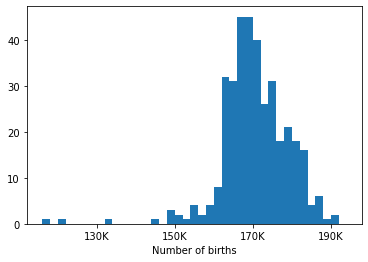

In [4]:
plt.hist(counts_df.births,bins = np.arange(116000, 195000, 2000))
plt.xticks(ticks=[130000,150000,170000,190000], labels=["130K","150K","170K","190K"])
plt.xlabel("Number of births");

Note that some days of the year are outliers in number of births. Can you guess which?

We will use these counts to estimate the probability that a given date is a birthday for a random US subject.

In [5]:
bday_probs=counts_df.births/sum(counts_df.births)

These probabilities are added to the simulation when using the `random.choice` function. Look at the function below and compare it to the `birthday_sim` function introduced in Section 11.2.

In [6]:
# adding February 29 - the number of possible birthdays is now 366
birthdays2=np.arange(1,367,1)

def birthday_sim2(n,nrep,pr):
    '''Estimate birthday matching probabilities using nrep simulations.
       The 366 possible birthdays are weighted by given probabilities'''
    outcomes = np.array([])
    for i in np.arange(nrep):
        outcomes = np.append(outcomes,
                Counter(np.random.choice(birthdays2,n,p=pr)).most_common(1)[0][1])
    return outcomes

We calculate below the probability for the case $n=23$ using these relaxed assumptions. Before running the cell or reading its output, do you think the probability will be higher or lower? 

In [7]:
n=23
nrep=100000
sum(birthday_sim2(n,nrep,bday_probs)>1)/nrep

0.50538

**Note**: more accurate simulation experiments do not always lead to different results - but we do not know that before performing them!

We will continue to investigate the issue of analytical and computation approaches throughout this textbook.
